# Modeling Notebook
This notebook is used to import a clean data set. Run a subset of different ML-Models and a cross-validation on the best performing model.

In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# Prints out all outputs of the cell and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import library to ignore errors
from warnings import simplefilter

# Set ignore warnings for future and user warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)


/Users/msp/neuefische/Project_2/Personality-vs-DrugUse/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Importing and displaying the data
df = pd.read_csv('data/drug_consumption_clean.csv', index_col=0)
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Semer,VSA,User
0,35-44,female,Prof_cert,UK,White_Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,0
1,25-34,male,PhD,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,0,0,0,0,0,0,0,1
2,35-44,male,Prof_cert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
3,18-24,female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,0,0,0
4,35-44,female,PhD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# removing columns for individual drugs
drug_columns = ['Amphet', 'Amyl', 'Benzos', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'Semer', 'VSA']
df = df.drop(drug_columns, axis = 1)

del_cols = ['Age', 'Country', 'Ethnicity']

df = df.drop(del_cols, axis = 1)

df.head()

,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
0,female,Prof_cert,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,male,PhD,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,male,Prof_cert,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,female,Masters,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,female,PhD,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


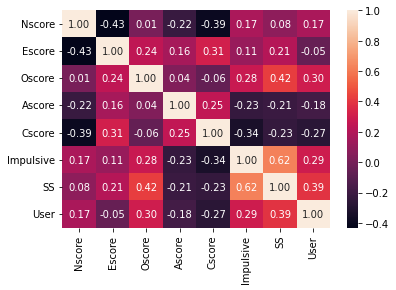

In [4]:
# Plot correlation between features
sns.heatmap(df.corr(), annot=True, fmt = ".2f");

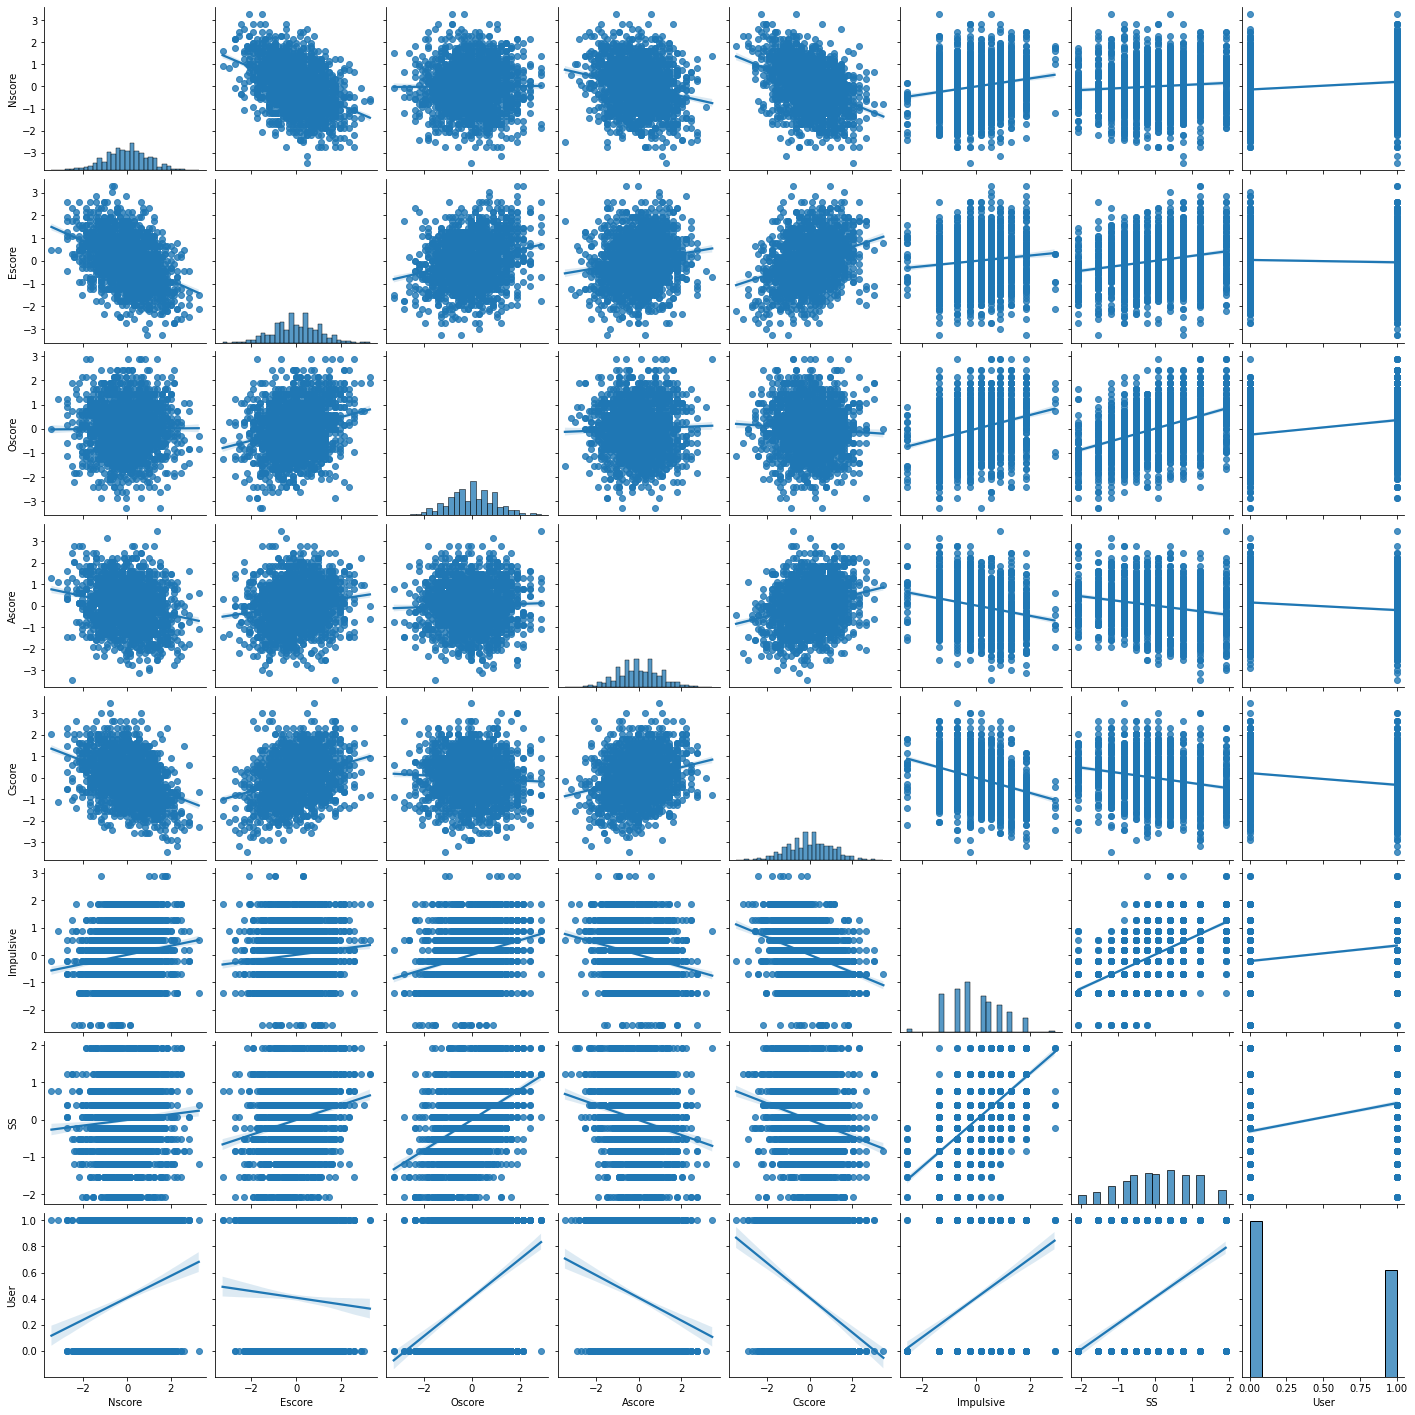

In [5]:
# Plot the distribution of data in pair plots of two features
sns.pairplot(df, kind='reg')

In [6]:
# Define non-categorical variables
non_cat_vars = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Define categorical variables
cat_vars = [col for col in df.columns.to_list() if col not in non_cat_vars]

# Cast variable type for categorical variables
for feat in cat_vars:
    df[feat] = df[feat].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Gender     1877 non-null   category
 1   Education  1877 non-null   category
 2   Nscore     1877 non-null   float64 
 3   Escore     1877 non-null   float64 
 4   Oscore     1877 non-null   float64 
 5   Ascore     1877 non-null   float64 
 6   Cscore     1877 non-null   float64 
 7   Impulsive  1877 non-null   float64 
 8   SS         1877 non-null   float64 
 9   User       1877 non-null   category
dtypes: category(3), float64(7)
memory usage: 188.0 KB


In [7]:
# replacing categorical features with dummy columns
for i in df.columns:
    if i != 'User':
        if df[i].dtype == 'category':
            df = pd.get_dummies(df, columns=[i], prefix=i, prefix_sep="_", drop_first=True)


In [8]:
# Split data set into training and testing data, define target variable and features
from sklearn.model_selection import train_test_split

RSEED = 42
y=df['User']
X=df.drop('User', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RSEED)


In [9]:
# Check the shape of the train test split
X_train.shape, X_test.shape

((1407, 16), (470, 16))

## Run Baseline Model
The baseline model assumes that everybody with above average sensation seeking values is a user

In [10]:
# Calculate the mean
baseline = X_train['SS'].mean()

# Predict  and view the target variable using the baseline model
y_pred = pd.Series((X_test['SS']>baseline) * 1, name= "Y_pred")
y_pred

1624    0
1071    0
450     1
1353    1
1865    1
       ..
1161    1
1303    1
870     0
23      0
458     1
Name: Y_pred, Length: 470, dtype: int64

### Get score of model (cost score)
Assumption: each kind of classification carries a certain cost

__test_cost__ is the costs caused by performing the psychological test to obtain the values

__training_cost__ is the average cost caused by providing someone with an anti-drug training

__user_cost__ is the average cost to society of someone being a drug-user

__prob_clean__ is the probability of a potential drug user to stay clean after the training


- __True positives__: testing costs + training costs + user_cost of people who, even though trained, did not stay clean
- __True negatives__: testing costs
- __False negatives__: testing costs + user_cost
- __False positives__: testing costs + training costs


In [11]:
# Define the cost score
def min_cost_scorer(y_test, y_pred, test_cost = 100, training_cost = 10000, prob_clean = 0.5, user_cost = 50000):
    # get confusion matrix from y_test and y_predict
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

    # cost of students taking the test
    test_costs = test_cost * sum(sum(cm))
    # cost of a student falsely identified to not consume drugs
    FN_cost = user_cost * cm[1][0]
    # cost of a student having training due to falsely being identified as a drug user
    FP_cost = training_cost * cm[0][1]
    # cost of a student having training due to correctly being identified as a potential drug user considering 
    # that the training is prob_clean % effective
    TP_cost = training_cost * cm[1][1] + user_cost * cm[1][1] * (1 - prob_clean)

    return test_costs + FN_cost + FP_cost + TP_cost

In [12]:
# Calculate cost score of the baseline model
print("Cost score of baseline model: {:,}".format(min_cost_scorer(y_test, y_pred)))

Cost score of baseline model: 8,422,000.0


## Run different models

In [13]:
# Import the libraries / models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import the metrics
from sklearn.metrics import confusion_matrix

In [14]:
# Initialize each model to be tested

lr_model = LogisticRegression(random_state=RSEED)
knn_model = KNeighborsClassifier()
svm_model = LinearSVC(max_iter=2000, random_state=RSEED)
svc_model = SVC(random_state=RSEED)
dt_model = DecisionTreeClassifier(random_state=RSEED)
et_model = ExtraTreeClassifier(random_state=RSEED)
rf_model = RandomForestClassifier(random_state=RSEED)
ada_model = AdaBoostClassifier(random_state=RSEED)

In [15]:
# Combine all initialized model in an iterable (list)
models = [lr_model, knn_model, svm_model, svc_model, dt_model, et_model, rf_model, ada_model]

# Initialize lists for output (model names, result of the cost function for test and train data)
model_names = []
cost_results = []
cost_results_train = []

# Fit all models and calculate the associated cost
for i, model in enumerate(models):
    print("="*50)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    cost_results.append(min_cost_scorer(y_test, y_pred))
    # calculate cost for train data
    y_pred_train = model.predict(X_train)
    cost_results_train.append(min_cost_scorer(y_train, y_pred_train))

    model_names.append(model.__class__.__name__)
    print(cm)
    print(f"costs_test = {round(cost_results[i],2)}")
    print(f"costs_train = {round(cost_results_train[i],2)}")

cost_results_train = np.array(cost_results_train)
cost_results = np.array(cost_results)

# Create a dataframe of the costs to sort and display
df_costs = pd.DataFrame({"Cost_test":cost_results,'Cost_train':cost_results_train}, index=[model_names])
df_costs.sort_values(by='Cost_test')

LogisticRegression(random_state=42)

[[237  42]
 [ 71 120]]
costs_test = 8217000.0
costs_train = 24915700.0


KNeighborsClassifier()

[[219  60]
 [ 71 120]]
costs_test = 8397000.0
costs_train = 24055700.0


LinearSVC(max_iter=2000, random_state=42)

[[236  43]
 [ 72 119]]
costs_test = 8242000.0
costs_train = 24910700.0


SVC(random_state=42)

[[226  53]
 [ 59 132]]
costs_test = 8147000.0
costs_train = 24075700.0


DecisionTreeClassifier(random_state=42)

[[200  79]
 [ 75 116]]
costs_test = 8647000.0
costs_train = 20195700.0


ExtraTreeClassifier(random_state=42)

[[198  81]
 [ 82 109]]
costs_test = 8772000.0
costs_train = 20195700.0


RandomForestClassifier(random_state=42)

[[228  51]
 [ 72 119]]
costs_test = 8322000.0
costs_train = 20195700.0


AdaBoostClassifier(random_state=42)

[[237  42]
 [ 72 119]]
costs_test = 8232000.0
costs_train = 24670700.0


,Cost_test,Cost_train
SVC,8147000.0,24075700.0
LogisticRegression,8217000.0,24915700.0
AdaBoostClassifier,8232000.0,24670700.0
LinearSVC,8242000.0,24910700.0
RandomForestClassifier,8322000.0,20195700.0
KNeighborsClassifier,8397000.0,24055700.0
DecisionTreeClassifier,8647000.0,20195700.0
ExtraTreeClassifier,8772000.0,20195700.0


## Create a scorer to perform the grid/randomized cross validation

In [16]:
# Import the module to create the scorer from the cost function
from sklearn.metrics import make_scorer

# Create the scorer from the cost function
cost_scorer = make_scorer(min_cost_scorer, greater_is_better=False)

## Randomized Search CV for better Hyperparameters
Find approximate range of optimal hyper-parameters for the SVC model

In [17]:
# Import the randomized search cross validation module
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for randomized search
param_grid = {"kernel": ["rbf", "linear"],
                "gamma": np.logspace(-1,2,4), 
                "C": np.logspace(-4,3,8)}

CV_svc = RandomizedSearchCV(estimator=SVC(), param_distributions=param_grid, n_iter=20 , cv= 5, scoring=cost_scorer, n_jobs=-1, verbose = 1, random_state=RSEED, refit=True)
CV_svc.fit(X_train, y_train)
CV_svc.best_params_
CV_svc.scorer_ , CV_svc.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/msp/neuefische/Project_2/Personality-vs-DrugUse/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/msp/neuefische/Project_2/Personality-vs-DrugUse/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/msp/neuefische/Project_2/Personality-vs-DrugUse/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/msp/neuefische/Project_2/Personality-vs-DrugUse/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWar

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'gamma': array([  0.1,   1. ,  10. , 100. ]),
                                        'kernel': ['rbf', 'linear']},
                   random_state=42,
                   scoring=make_scorer(min_cost_scorer, greater_is_better=False),
                   verbose=1)

{'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}

(make_scorer(min_cost_scorer, greater_is_better=False), -5000140.0)

## Grid Search around the approximate optimal values obtained from the randomized search

In [18]:
# Import a grid search cross validation module
from sklearn.model_selection import GridSearchCV


# Create the hyperparameter grid for the gridsearch
param_grid = {"kernel": ["linear"],
                "gamma": ['scale'],#np.arange(-0.0001,0.01,0.001), 
                "C": np.arange(0.01,0.10,0.01)}

# Run grid search and fit the optimal found model
CV_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv= 5, scoring=cost_scorer, n_jobs=-1, verbose = 2, refit=True)
CV_svc.fit(X_train, y_train)
CV_svc.best_params_
CV_svc.scorer_ , CV_svc.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .................C=0.02, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.02, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.02, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.02, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.02, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.03, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.03, gamma=scale, ke

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'gamma': ['scale'], 'kernel': ['linear']},
             scoring=make_scorer(min_cost_scorer, greater_is_better=False),
             verbose=2)

{'C': 0.05, 'gamma': 'scale', 'kernel': 'linear'}

(make_scorer(min_cost_scorer, greater_is_better=False), -4989140.0)

### Calculate the cost savings due to the implementation of the model

In [19]:
# Predict with the best model and calculate the associated costs
y_pred_best = CV_svc.predict(X_test) 
cost_best = min_cost_scorer(y_test, y_pred_best)

# Assuming everybody would get the training and calculate the associated costs
y_pred_all = np.ones(len(y_test))
cost_all_user = min_cost_scorer(y_test, y_pred_all)

# Assuming no one would get the training and calculate the associated costs
y_pred_zero = np.zeros(len(y_test))
cost_no_user =  min_cost_scorer(y_test, y_pred_zero, test_cost= 0)

print("Costs of predicting based on best model: {:,}".format(cost_best))
print("Costs of predicting all to be a user: {:,}".format(cost_all_user))
print("Costs of not implementing the detection system: {:,}".format(cost_no_user))

print(confusion_matrix(y_test, y_pred))

Costs of predicting based on best model: 8,232,000.0
Costs of predicting all to be a user: 9,522,000.0
Costs of not implementing the detection system: 9,550,000.0
[[237  42]
 [ 72 119]]


# Error Analysis

In [20]:
from pandas_profiling import ProfileReport

In [21]:
# Create a dataframe that includes the feature values and the prediction obtained from the model (TP, TN, FP, FN)

X_test_incl_error = X_test.copy(deep = True)
test_pred_combined = pd.concat([X_test, y_test, pd.Series(y_pred, name = 'y_pred', index=y_test.index)], axis =1)
test_pred_combined[['User', 'y_pred']] = test_pred_combined[['User', 'y_pred']].astype('str')
test_pred_combined.eval('eval_col = User + y_pred', inplace=True)

eval_dict = {'00':'TN', 
             '01':'FP', 
             '10':'FN',
             '11':'TP'}

test_pred_combined.eval_col = test_pred_combined.eval_col.map(eval_dict)
test_pred_combined.drop(['User', 'y_pred'], axis = 1)

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Gender_male,Education_Left_school_17,Education_Left_school_18,Education_Left_school_bef_16,Education_Masters,Education_PhD,Education_Prof_cert,Education_Some_college_or_univ,Education_University,eval_col
1624,-1.86962,1.28610,-1.27553,-0.15487,1.46191,-1.37983,-2.07848,0,0,0,0,1,0,0,0,0,TN
1071,-0.67825,0.32197,-0.01928,-0.30172,1.46191,-1.37983,-1.54858,0,0,0,0,0,1,0,0,0,TN
450,-0.14882,-0.15487,0.14143,0.13136,0.93949,-1.37983,0.07987,0,0,0,0,0,0,0,0,1,TN
1353,-1.69163,0.63779,0.58331,-0.01729,0.58489,0.88113,0.40148,1,0,0,0,0,0,0,1,0,TP
1865,0.04257,0.00332,2.44904,-0.60633,-2.18109,0.88113,1.22470,0,0,0,0,0,0,1,0,0,TP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,-0.34799,0.32197,-0.01928,0.13136,0.41594,0.19268,0.07987,1,1,0,0,0,0,0,0,0,FN
1303,-0.34799,0.63779,1.88511,-0.60633,0.25953,0.19268,0.76540,1,0,0,0,0,0,0,1,0,TP
870,-0.67825,-0.43999,-0.01928,0.59042,-0.27607,-0.71126,-0.84637,0,0,0,0,1,0,0,0,0,TN
23,1.60383,-3.27393,-1.27553,0.28783,-1.01450,-1.37983,-1.54858,1,0,0,0,0,0,0,0,0,FN


[Text(0.5, 1.0, 'FN')]

Text(0.5, 1.0, 'SS: FN')

(-3.0, 3.0)

[Text(0.5, 1.0, 'FP')]

Text(0.5, 1.0, 'SS: FP')

(-3.0, 3.0)

[Text(0.5, 1.0, 'TN')]

Text(0.5, 1.0, 'SS: TN')

(-3.0, 3.0)

[Text(0.5, 1.0, 'TP')]

Text(0.5, 1.0, 'SS: TP')

(-3.0, 3.0)

[Text(0.5, 1.0, 'FN')]

Text(0.5, 1.0, 'Oscore: FN')

(-3.0, 3.0)

[Text(0.5, 1.0, 'FP')]

Text(0.5, 1.0, 'Oscore: FP')

(-3.0, 3.0)

[Text(0.5, 1.0, 'TN')]

Text(0.5, 1.0, 'Oscore: TN')

(-3.0, 3.0)

[Text(0.5, 1.0, 'TP')]

Text(0.5, 1.0, 'Oscore: TP')

(-3.0, 3.0)

[Text(0.5, 1.0, 'FN')]

Text(0.5, 1.0, 'Impulsive: FN')

(-3.0, 3.0)

[Text(0.5, 1.0, 'FP')]

Text(0.5, 1.0, 'Impulsive: FP')

(-3.0, 3.0)

[Text(0.5, 1.0, 'TN')]

Text(0.5, 1.0, 'Impulsive: TN')

(-3.0, 3.0)

[Text(0.5, 1.0, 'TP')]

Text(0.5, 1.0, 'Impulsive: TP')

(-3.0, 3.0)

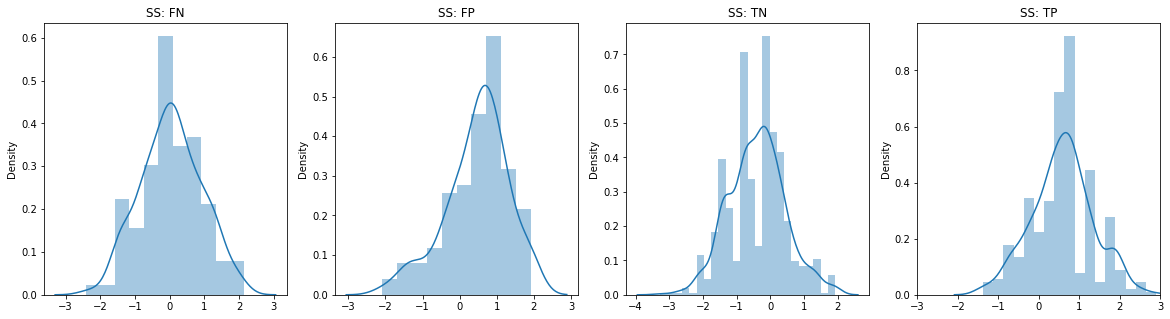

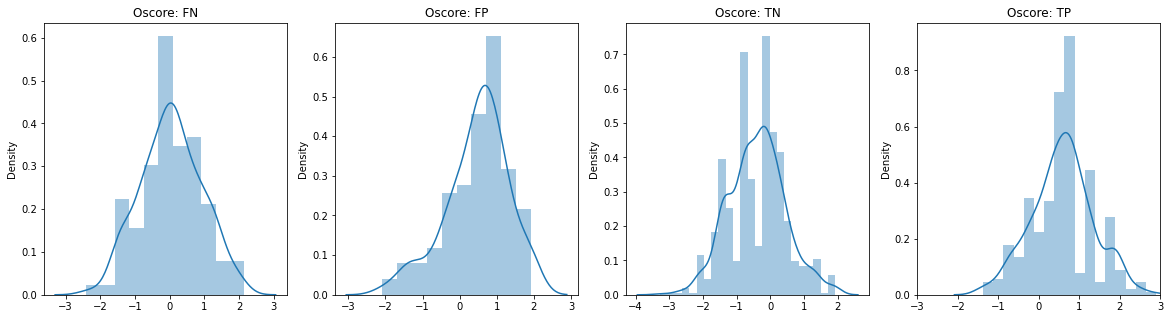

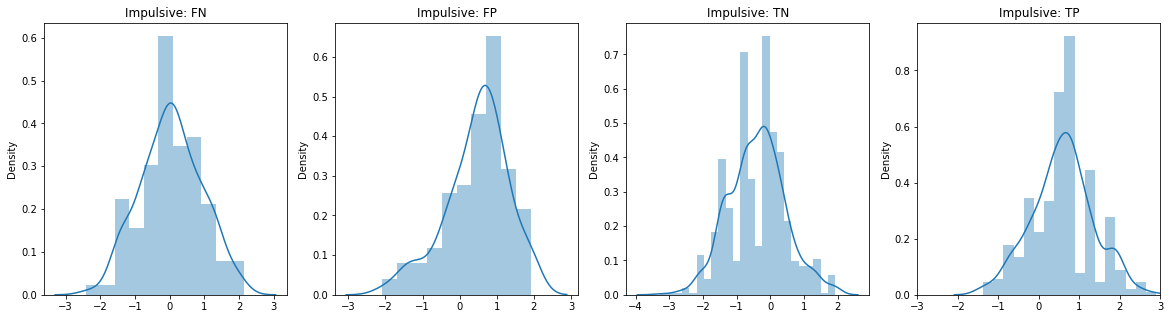

In [22]:
# Plot the distributions according to classification category 
feat_plt = ['SS','Oscore', 'Impulsive']
cases = ['FN', 'FP', 'TN', 'TP']


for feat in feat_plt:
    fig, axs = plt.subplots(1,4, figsize = (20,5))
    for i,case in enumerate(cases):
        sns.distplot(x=test_pred_combined[test_pred_combined.eval_col == case][feat_plt], kde=True, ax=axs[i]).set(title=case)
        axs[i].set_title('{}: {}'.format(feat, case))
        plt.xlim(-3, 3)